# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

# For Data Visualization
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam,SGD


In [ ]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

**Let us check the version of tensorflow.**

In [ ]:
#check the version of tensorflow
print(tf.__version__)

2.17.1


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
# read the data

path = "/content/drive/MyDrive/Great Learning Data Science Class/SVHN_single_grey1.h5"
with h5py.File(path, "r") as df:
    # First, print available keys to see what datasets exist
    print(list(df.keys()))

    # Split the data into the train and the test dataset.
    x_train = df['X_train'][:]
    y_train = df['y_train'][:]
    x_test = df['X_test'][:]
    y_test = df['y_test'][:]
    x_val = df['X_val'][:]
    y_val = df['y_val'][:]


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [ ]:
#display the number of images in the training and the testing dataset
print(x_train.shape)
print(x_test.shape)

(42000, 32, 32)
(18000, 32, 32)


**Observation:** There are 42,000 images in the training dataset and 18,000 images in the test dataset

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

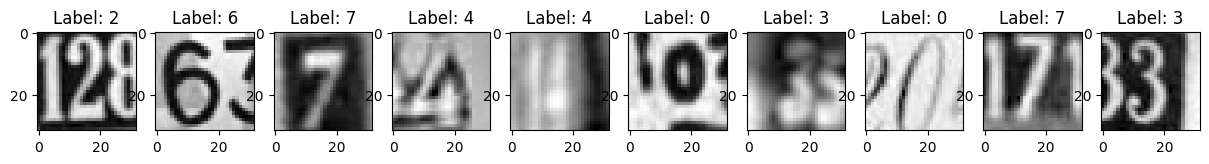

In [ ]:
def view_images(images, labels=None, num_images=10, figsize=(15, 10)):

#creates a single-row subplot with num_images columns, setting the figure size as specified
    fig, axes = plt.subplots(1, num_images, figsize=figsize)

# loop through image count
    for i in range(num_images):
        ax = axes[i] if num_images > 1 else axes

        # Display the image
        img = images[i]
        ax.imshow(img, cmap='gray')

        # Add label as title if provided
        if labels is not None:
            ax.set_title(f'Label: {labels[i]}')

    plt.show()

# View the first 10 images
view_images(x_train, y_train, num_images=10)




## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset

print("Array:", x_train[0])
print("Shape:", x_train[0].shape)


Array: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]
Shape: (32, 32)


### **Normalize the train and the test data**

In [ ]:
# Normalizing the image pixels
x_train_normalized = x_train.astype('float32')/255.0
x_test_normalized = x_test.astype('float32')/255.0

Print the shapes of Training and Test data

In [ ]:
# The normalization process preserves the original shape of the data while only changing the pixel values from[ 0, 255] to [0, 1]
print(x_train_normalized.shape)
print(x_test_normalized.shape)


(42000, 32, 32)
(18000, 32, 32)


### **One-hot encode output**

In [ ]:
# Create one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fix the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)



### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Intializing a sequential model
nn_model_1 = Sequential()

# Flatten the input to add dense convolutional layers on top of it
nn_model_1.add(Flatten(input_shape=(32, 32)))

# Add first hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
nn_model_1.add(Dense(64, activation='relu', input_shape=(1024,)))

# Add Second hidden layer with 32 nodes and the relu activation
nn_model_1.add(Dense(32, activation='relu'))

# Add the output layer with 10 nodes and activation functions as softmax
nn_model_1.add(Dense(10, activation='softmax'))

# Optimizer for the model, Adam with a learning rate (lr) of 0.001
optimizer = Adam(learning_rate = 0.001)

# Compile model
nn_model_1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generating the summary of the model
nn_model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [ ]:
history = nn_model_1.fit(
            x_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            batch_size=128,
            verbose=1
)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1088 - loss: 2.3082 - val_accuracy: 0.1744 - val_loss: 2.2324
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2135 - loss: 2.1556 - val_accuracy: 0.3065 - val_loss: 1.9384
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3158 - loss: 1.9163 - val_accuracy: 0.3844 - val_loss: 1.7683
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4275 - loss: 1.6879 - val_accuracy: 0.5104 - val_loss: 1.4989
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5228 - loss: 1.4552 - val_accuracy: 0.5569 - val_loss: 1.3679
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5639 - loss: 1.3513 - val_accuracy: 0.5810 - val_loss: 1.3055
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5868 - loss: 1.2883 - val_accuracy: 0.6051 - val_loss: 1.2524
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6077 - loss: 1.2406 - val_accuracy: 0.

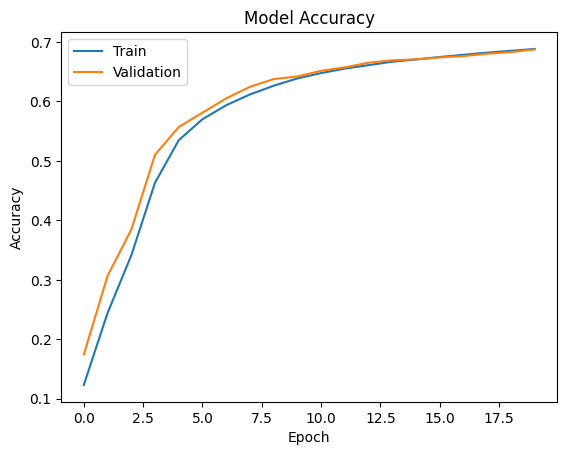

563/563 - 1s - 2ms/step - accuracy: 0.6896 - loss: 1.0232


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

accuracy = nn_model_1.evaluate(x_test_normalized, y_test_encoded, verbose=1)

**Observations:_______** The ANN model 'nn_model_1' performed okay with only a **training accuray of approximately 69%** and a **validation accuracy of approximately 69%.**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# Intializing a second sequential model
nn_model_2 = Sequential()

# Flatten the input to add dense convolutional layers on top of it
nn_model_2.add(Flatten(input_shape=(32, 32)))

# Add first hidden layer with 256 nodes and the relu activation and the input shape = (1024, )
nn_model_2.add(Dense(256, activation='relu', input_shape=(1024,)))

# Add Second hidden layer with 128 nodes and the relu activation
nn_model_2.add(Dense(128, activation='relu'))

# Dropout layer with 20% drop rate
nn_model_2.add(Dropout(0.2))

# Add Third hidden layer with 64 nodes and the relu activation
nn_model_2.add(Dense(64, activation='relu'))

# Add Fourth hidden layer with 64 nodes and the relu activation
nn_model_2.add(Dense(64, activation='relu'))

# Add Fifth hidden layer with 32 nodes and the relu activation
nn_model_2.add(Dense(32, activation='relu'))

# Add the BatchNormalization layer
nn_model_2.add(BatchNormalization())

# Adding the output layer with 10 nodes and activation functions as softmax
nn_model_2.add(Dense(10, activation='softmax'))

# Optimizer for the model, Adam with a learning rate (lr) of 0.0005
optimizer = Adam(learning_rate = 0.0005)

# Compile model
nn_model_2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generating the summary of the model
nn_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [ ]:
history = nn_model_2.fit(
            x_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size=128,
            verbose=1
)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1012 - loss: 2.4744 - val_accuracy: 0.0961 - val_loss: 2.3224
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1183 - loss: 2.2989 - val_accuracy: 0.2407 - val_loss: 2.1573
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3341 - loss: 1.8828 - val_accuracy: 0.4882 - val_loss: 1.5358
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5160 - loss: 1.4427 - val_accuracy: 0.5579 - val_loss: 1.3054
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5782 - loss: 1.2844 - val_accuracy: 0.6402 - val_loss: 1.1358
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6187 - loss: 1.1748 - val_accuracy: 0.6624 - val_loss: 1.0648
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6472 - loss: 1.1078 - val_accuracy: 0.6830 - val_loss: 1.0185
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6607 - loss: 1.0586 - val_accu

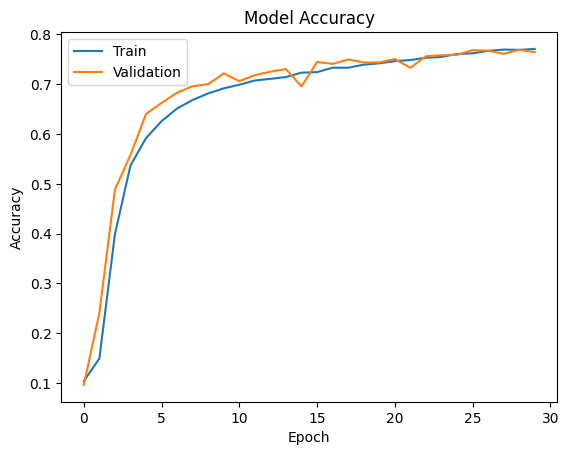

563/563 - 2s - 3ms/step - accuracy: 0.7618 - loss: 0.7663


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

accuracy = nn_model_2.evaluate(x_test_normalized, y_test_encoded, verbose=1)

**Observations:_______** The second ANN model 'nn_model_2' performed slightly better than the first ANN model 'nn_model_1' with a **training accuracy of approximately 77%** and a **validation accuracy of approximately 76%.** Which is an 8% increase in training accuracy and a 7% increase in validation accuracy

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred=nn_model_2.predict(x_test_normalized)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

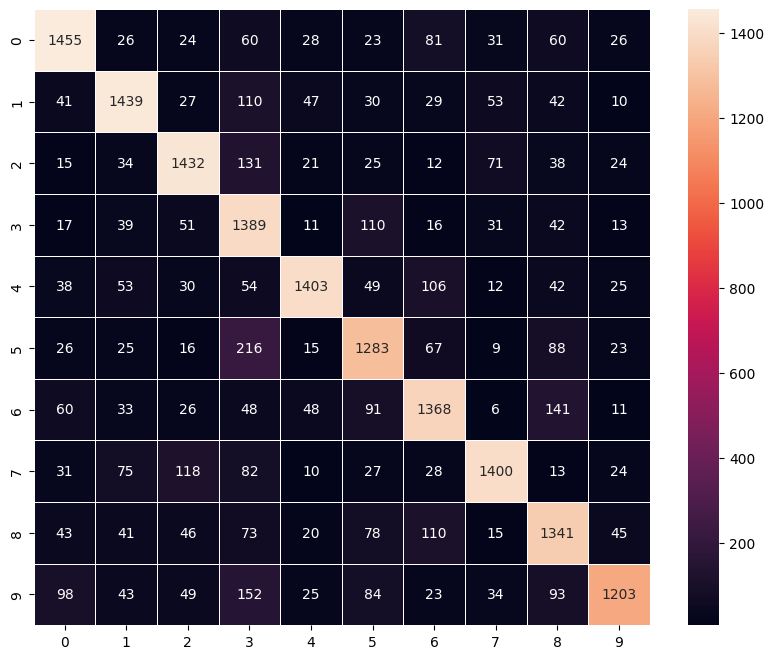

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1814
           1       0.80      0.79      0.79      1828
           2       0.79      0.79      0.79      1803
           3       0.60      0.81      0.69      1719
           4       0.86      0.77      0.82      1812
           5       0.71      0.73      0.72      1768
           6       0.74      0.75      0.75      1832
           7       0.84      0.77      0.81      1808
           8       0.71      0.74      0.72      1812
           9       0.86      0.67      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.77      0.76      0.76     18000
weighted avg       0.77      0.76      0.76     18000



In [ ]:
# Plot the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Print the obtained results using the classification report
print(classification_report(y_test_arg, y_pred_arg))

**Final Observations:__________**
- Misclassification mostly occured on number 5, which was confused with number 3, number 7 which was confused with number 1 and number 6 which was confused for number 8
- Number 6 has a poor recall rate.
- Numbers 7 and 0, have the highest f1-score.
- Overall, the model is performing okay with an accuracy of about 76%
- The relatively average performance on both the training and validation data suggest the model is underfitting. Increasing the model's complexiity and optimizing the hyperparameters, like learning rate, will improve the model fit.  

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
path = "/content/drive/MyDrive/Great Learning Data Science Class/SVHN_single_grey1.h5"
with h5py.File(path, "r") as df:

    # Split the data into the train and the test dataset.
    x_train = df['X_train'][:]
    y_train = df['y_train'][:]
    x_test = df['X_test'][:]
    y_test = df['y_test'][:]
    x_val = df['X_val'][:]
    y_val = df['y_val'][:]

Check the number of images in the training and the testing dataset.

In [ ]:
# Check the number of images in the training and the testing dataset
print(x_train.shape)
print(x_test.shape)

(42000, 32, 32)
(18000, 32, 32)


**Observation:** There are 42,000 images in the training dataset and 18,000 images in the test dataset


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset

print("Array:", x_train[0])
print("Shape:", x_train[0].shape)

Array: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]
Shape: (32, 32)


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape the training and the testing data
x_train = x_train.reshape((x_train.shape[0], 32, 32, 1))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 1))

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalizze the image pixels
x_train_normalized = x_train.astype('float32')/255.0
x_test_normalized = x_test.astype('float32')/255.0

Print New shape of Training and Test

In [ ]:
#Print New shape of Training and Tes
print(x_train_normalized.shape)
print(x_test_normalized.shape)

(42000, 32, 32, 1)
(18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Create one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

**Observation:** The test and training data is now a 4D array as required as input for CNN model


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Intializing a sequential model
cnn_model_1 = Sequential()

# Add first conv layer with 16 filters and kernel size 3x3 , padding 'same'
cnn_model_1.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 1)))

# Add a LeakyRelu layer with the slope equal to 0.1
cnn_model_1.add(LeakyReLU(alpha=0.1))

# Add second conv layer with 32 filters and kernel size 3x3 , padding 'same'
cnn_model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Add a second LeakyRelu layer with the slope equal to 0.1
cnn_model_1.add(LeakyReLU(alpha=0.1))

# Add max pooling to reduce the size of output of first conv layer
cnn_model_1.add(MaxPooling2D((2, 2)))

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
cnn_model_1.add(Flatten())

# Adding a fully connected dense layer with 32 nodes
cnn_model_1.add(Dense(32))

# Add a third LeakyRelu layer with the slope equal to 0.1
cnn_model_1.add(LeakyReLU(alpha=0.1))

# Adding the output layer with 10 nodes and activation functions as softmax
cnn_model_1.add(Dense(10, activation='softmax'))

# Optimizer for the model, Adam with a learning rate (lr) of 0.001
optimizer = Adam(learning_rate = 0.001)

# Compile model
cnn_model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
cnn_model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### **Plot the Training and Validation Accuracies and Write your observations.**

In [ ]:
history = cnn_model_1.fit(
            x_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            shuffle=True,
            batch_size=32,
            verbose=1
)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.3332 - loss: 1.8620 - val_accuracy: 0.7825 - val_loss: 0.7429
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 66s 62ms/step - accuracy: 0.8031 - loss: 0.6792 - val_accuracy: 0.8145 - val_loss: 0.6520
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 85s 65ms/step - accuracy: 0.8367 - loss: 0.5661 - val_accuracy: 0.8292 - val_loss: 0.6043
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.8543 - loss: 0.4997 - val_accuracy: 0.8363 - val_loss: 0.5853
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - accuracy: 0.8660 - loss: 0.4508 - val_accuracy: 0.8346 - val_loss: 0.5873
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - accuracy: 0.8796 - loss: 0.4067 - val_accuracy: 0.8370 - val_loss: 0.5849
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 87s 66ms/step - accuracy: 0.8920 - loss: 0.3699 - val_accuracy: 0.8345 - val_loss: 0.5986
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.9016 -

In [2]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

accuracy = cnn_model_1.evaluate(x_test_normalized, y_test_encoded, verbose=1)

NameError: name 'plt' is not defined

**Observations:__________**The CNN model 'cnn_model_1' performed well with a **training accuray of approximately 95%** and a **validation accuracy of approximately 83%.**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Intializing a sequential model
cnn_model_2 = Sequential()

# Add first conv layer with 16 filters and kernel size 3x3 , padding 'same'
cnn_model_2.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

# Add a LeakyRelu layer with the slope equal to 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))

# Add second conv layer with 32 filters and kernel size 3x3 , padding 'same'
cnn_model_2.add(Conv2D(32, (3, 3), padding="same"))

# Add a second LeakyRelu layer with the slope equal to 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))

# Add max pooling to reduce the size of output of first conv layer
cnn_model_2.add(MaxPooling2D((2, 2)))

# Add a BatchNormalization layer
cnn_model_2.add(BatchNormalization())

# Add third conv layer with 32 filters and kernel size 3x3 , padding 'same'
cnn_model_2.add(Conv2D(32, (3, 3), padding="same"))

# Add a third LeakyRelu layer with the slope equal to 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))

# Add fourth conv layer with 64 filters and kernel size 3x3 , padding 'same'
cnn_model_2.add(Conv2D(64, (3, 3),padding="same"))

# Add a fourth LeakyRelu layer with the slope equal to 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))

# Add second max pooling to reduce the size of output of first conv layer
cnn_model_2.add(MaxPooling2D((2, 2)))

# Add a second BatchNormalization layer
cnn_model_2.add(BatchNormalization())

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
cnn_model_2.add(Flatten())

# Add a dense layer with 32 nodes
cnn_model_2.add(Dense(32))

# Add a fifth LeakyRelu layer with the slope equal to 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))

# Dropout layer with 50% drop rate
cnn_model_2.add(Dropout(0.5))

# Adding the output layer with 10 nodes and activation functions as softmax
cnn_model_2.add(Dense(10, activation='softmax'))

# Optimizer for the model, Adam with a learning rate (lr) of 0.001
optimizer = Adam(learning_rate = 0.001)

# Compile model
cnn_model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
cnn_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

### **Plot the Training and Validation accuracies and write your observations.**

In [ ]:
history = cnn_model_2.fit(
            x_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            shuffle=True,
            batch_size=128,
            verbose=1
)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3322 - loss: 1.9162 - val_accuracy: 0.2952 - val_loss: 2.1123
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7766 - loss: 0.7315 - val_accuracy: 0.8408 - val_loss: 0.5305
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8243 - loss: 0.5818 - val_accuracy: 0.8568 - val_loss: 0.4892
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8476 - loss: 0.4988 - val_accuracy: 0.8808 - val_loss: 0.4383
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8604 - loss: 0.4579 - val_accuracy: 0.8615 - val_loss: 0.4607
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8743 - loss: 0.4175 - val_accuracy: 0.8923 - val_loss: 0.3692
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8813 - loss: 0.3870 - val_accuracy: 0.8894 - val_loss: 0.3873
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8891 - loss: 0.3653 - val_accuracy:

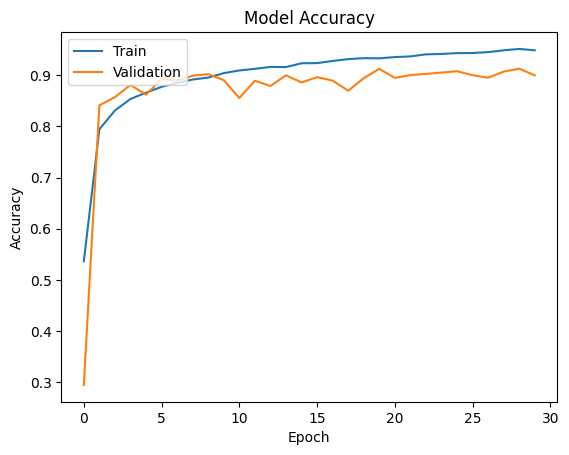

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8952 - loss: 0.4880


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

accuracy = cnn_model_2 .evaluate(x_test_normalized, y_test_encoded, verbose=1)

**Observations:________** The CNN model 'cnn_model_2' performed better than the CNN model 'cnn_model_1' in terms of validation accuracy with an approximate **validation accuray of approximately 89%**. However cnn_model_2 performed worse than cnn_model_1 in terms of training accuracy with an approximate **training accuracy of approximately 94%.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=cnn_model_2.predict(x_test_normalized)
y_pred

563/563 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

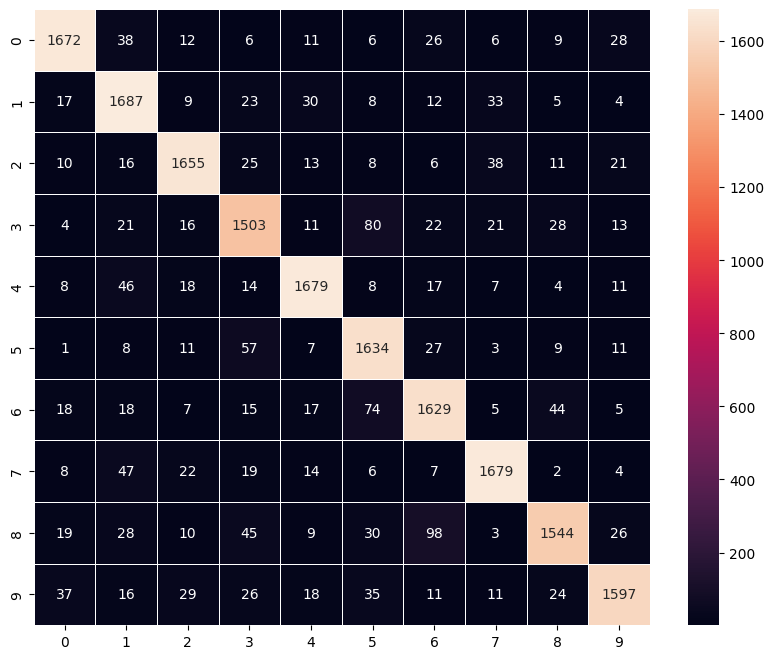

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### **Write your final observations on the performance of the model on the test data.**

In [ ]:
# Print the obtained results using the classification report
print(classification_report(y_test_arg, y_pred_arg))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1814
           1       0.88      0.92      0.90      1828
           2       0.93      0.92      0.92      1803
           3       0.87      0.87      0.87      1719
           4       0.93      0.93      0.93      1812
           5       0.87      0.92      0.89      1768
           6       0.88      0.89      0.88      1832
           7       0.93      0.93      0.93      1808
           8       0.92      0.85      0.88      1812
           9       0.93      0.89      0.91      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.91      0.90      0.90     18000



**Final Observations:_________**
- Misclassification mostly occured on number 8, which was confused with number 6, number 3 which was confused with number 5 and number 6 which was confused for number 5
- Number 8 had the lowest recall rate.
- Numbers 0, 4 and 7, have the highest f1-score.
- Overall, the model is performed well with an accuracy of about 90%

